<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [6]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



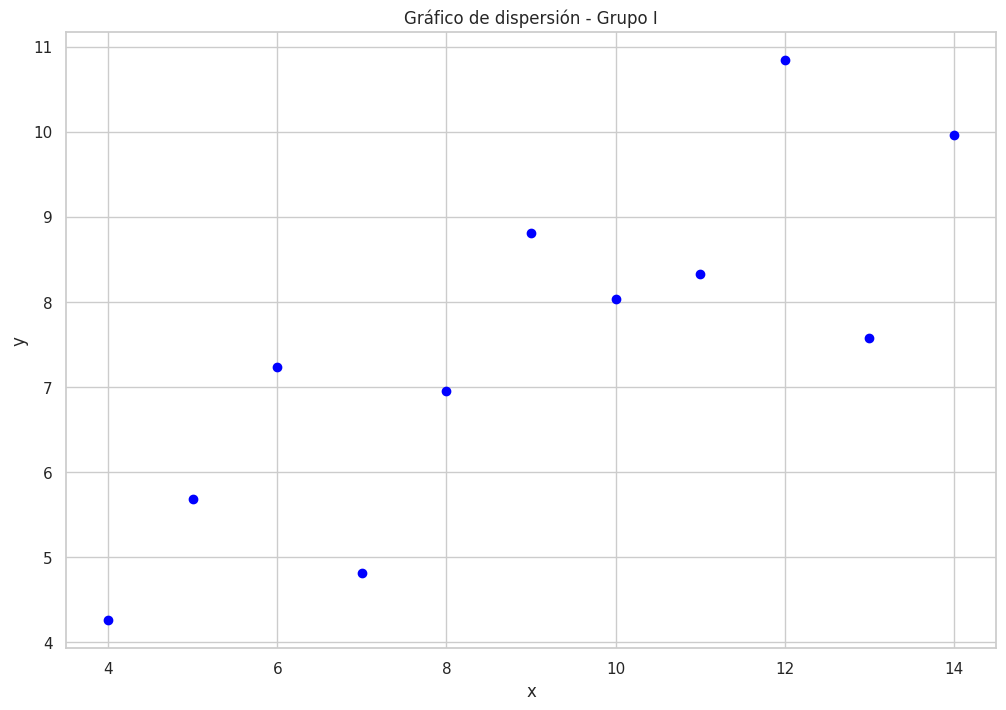

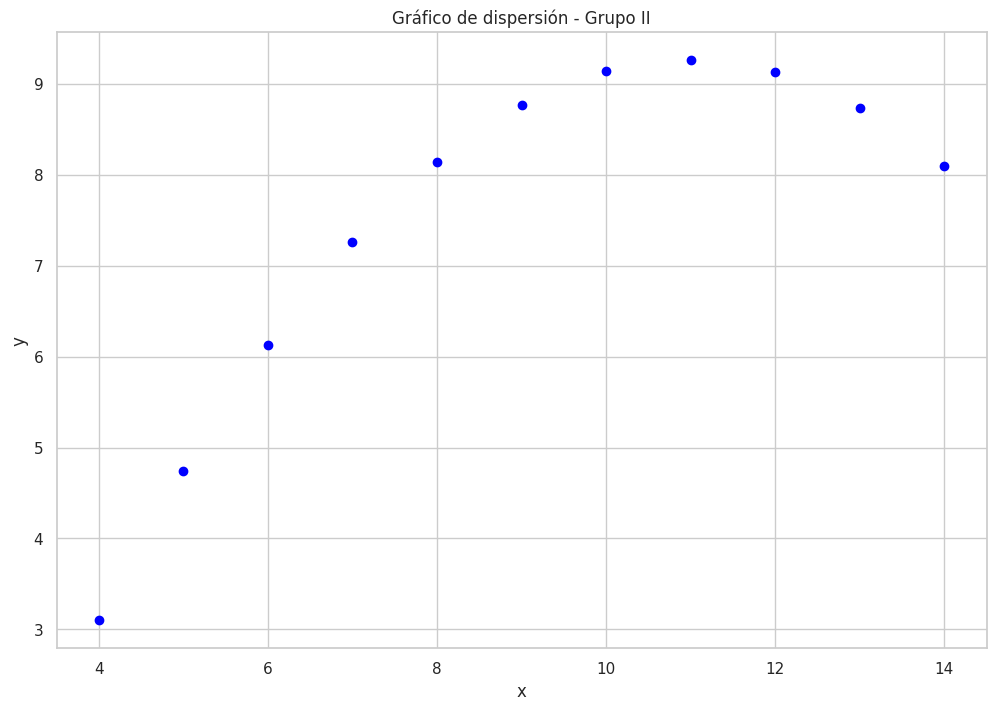

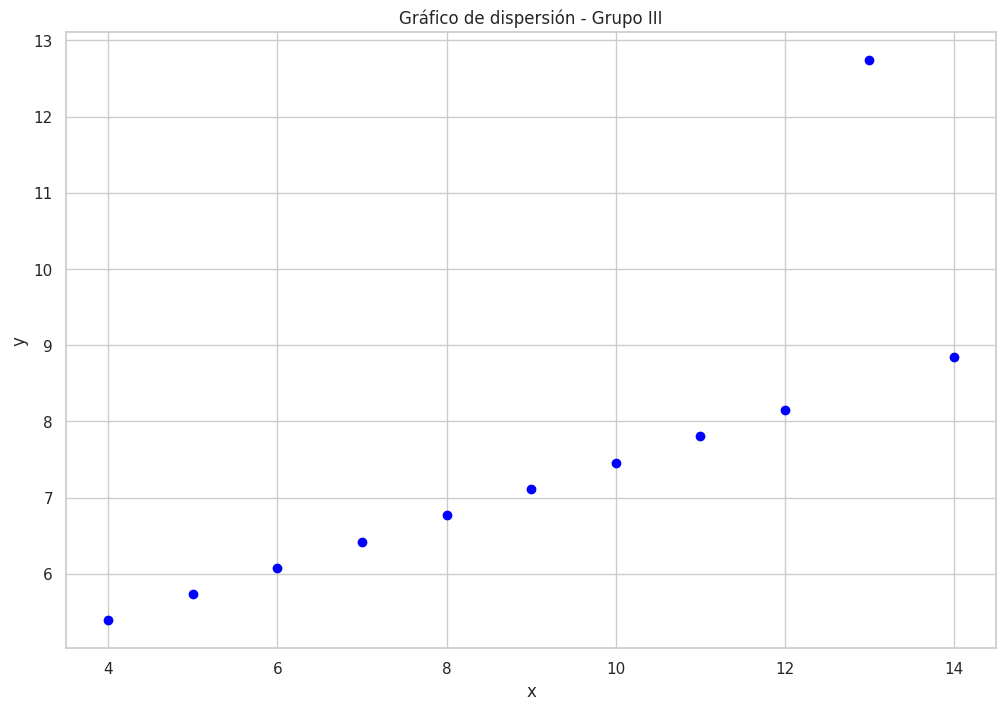

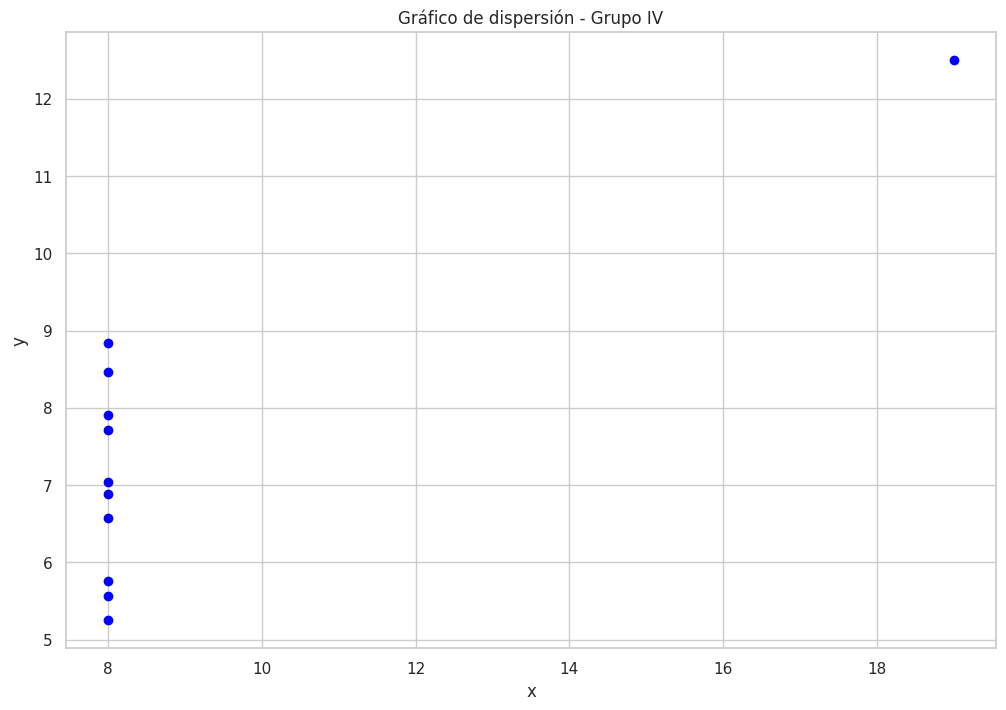

In [2]:
grupos = data['dataset'].unique()

for grupo in grupos:
    datos_grupo = data[data['dataset'] == grupo]
    plt.figure()
    plt.scatter(datos_grupo['x'], datos_grupo['y'], color="blue")
    plt.title(f"Grafico de dispersion: Grupo {grupo}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [3]:
for grupo in data['dataset'].unique():
    datos_grupo = data[data['dataset'] == grupo]
    print(f"\nResumen estadistico del grupo: {grupo}")
    print(datos_grupo.describe())


Resumen estadístico del grupo I
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

Resumen estadístico del grupo II
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

Resumen estadístico del grupo III
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

Resumen estadístico del grupo IV
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.




Grupo I
error cuadrático medio: 1.25
r^2: 0.67


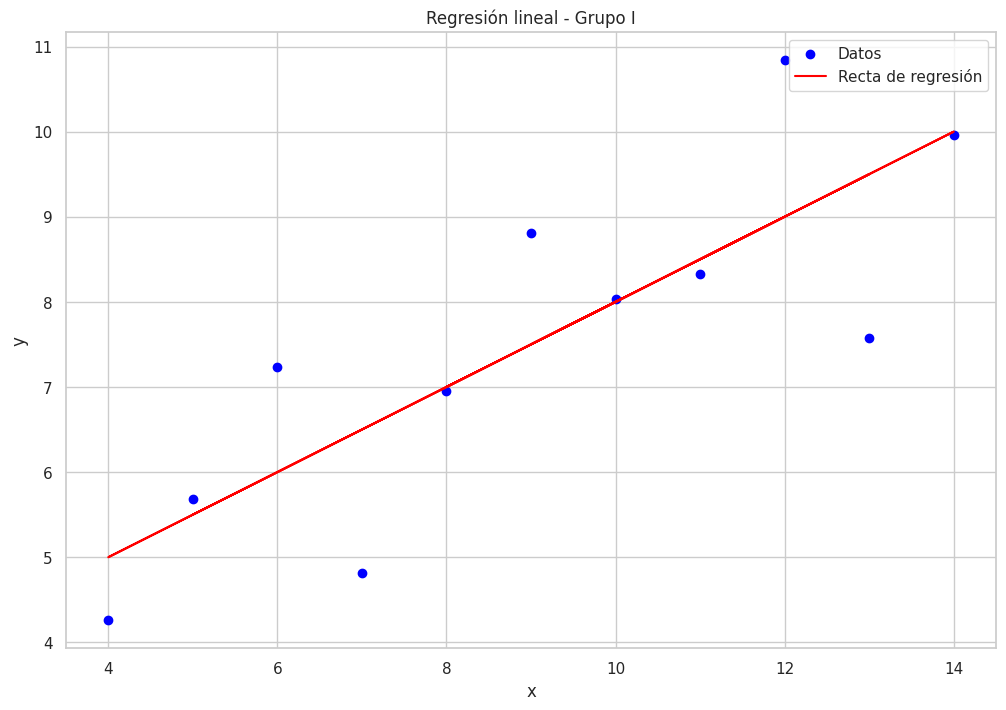


Grupo II
error cuadrático medio: 1.25
r^2: 0.67


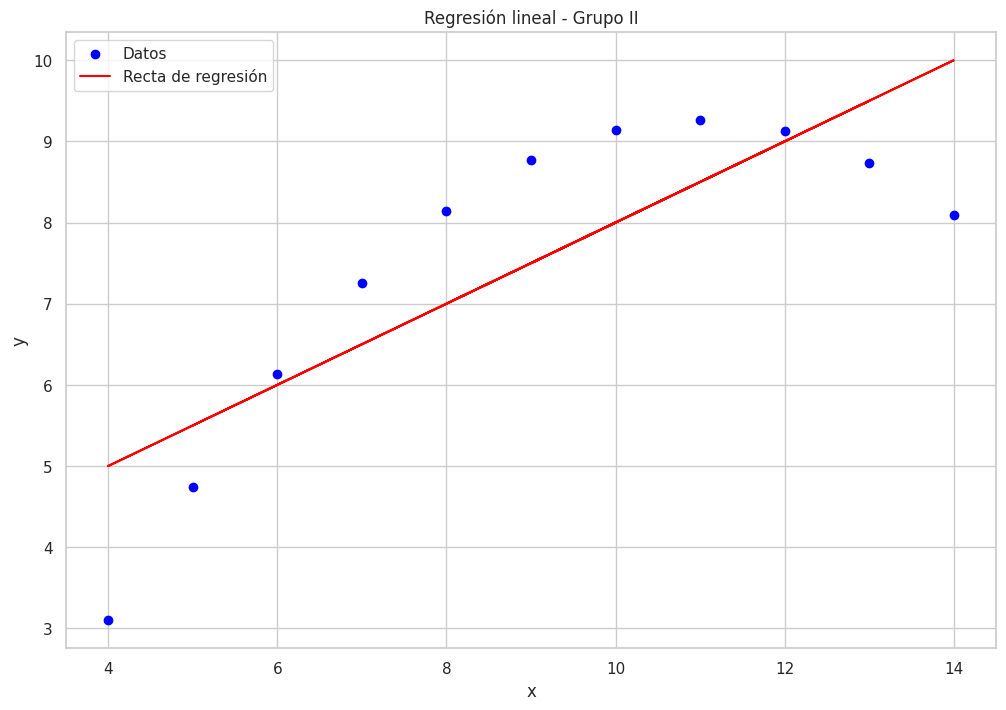


Grupo III
error cuadrático medio: 1.25
r^2: 0.67


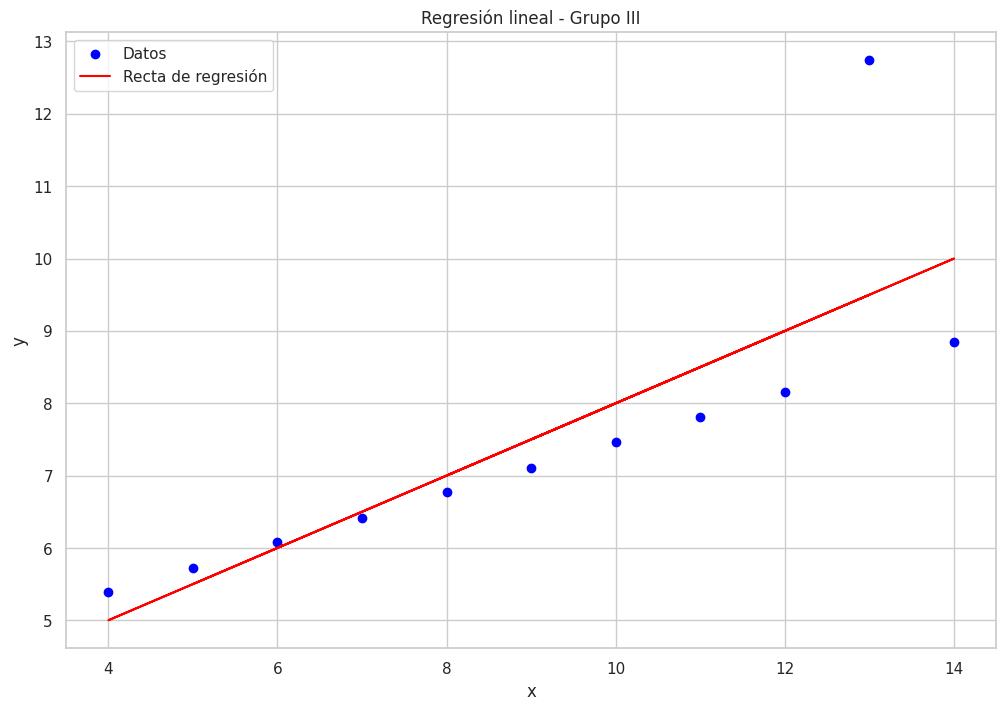


Grupo IV
error cuadrático medio: 1.25
r^2: 0.67


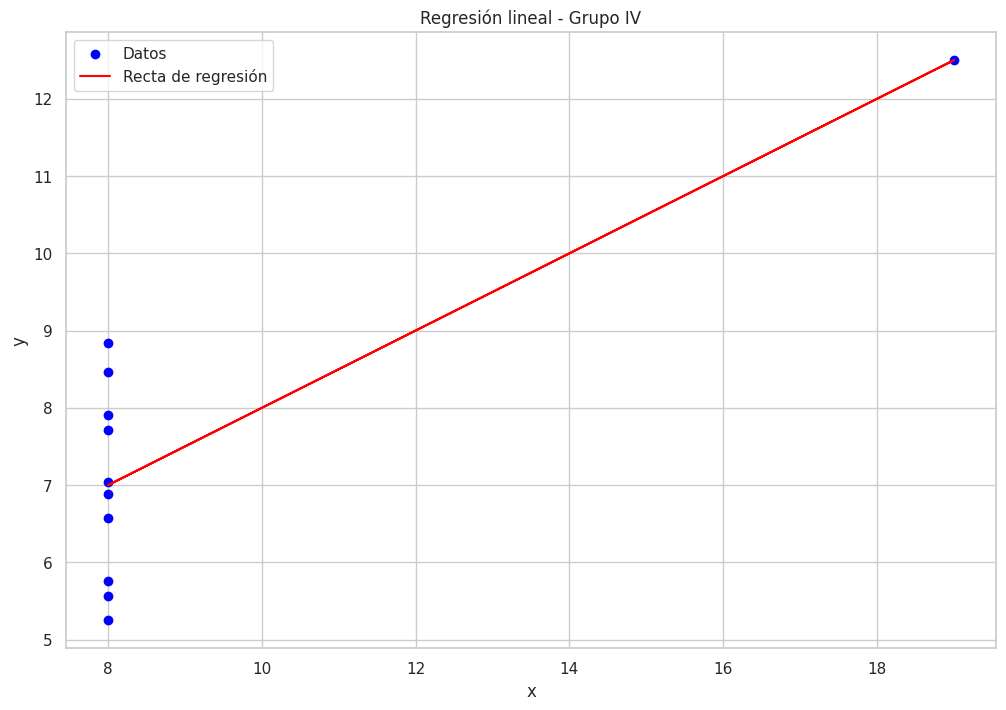

In [4]:
for grupo in data['dataset'].unique():
    datos_grupo = data[data['dataset'] == grupo]
    x = datos_grupo['x'].values.reshape(-1, 1)
    y = datos_grupo['y'].values
    modelo = LinearRegression()
    modelo.fit(x, y)
    y_pred = modelo.predict(x)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"\nGrupo {grupo}")
    print(f"error cuadratico medio: {mse:.2f}")
    print(f"r^2: {r2:.2f}")
    plt.figure()
    plt.scatter(x, y, color="blue", label="Datos")
    plt.plot(x, y_pred, color="red", label="Recta de regresion")
    plt.title(f"Regresion lineal: Grupo {grupo}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.


Regresión polinómica
error cuadrático medio: 0.00
coeficiente de determinación: 1.00


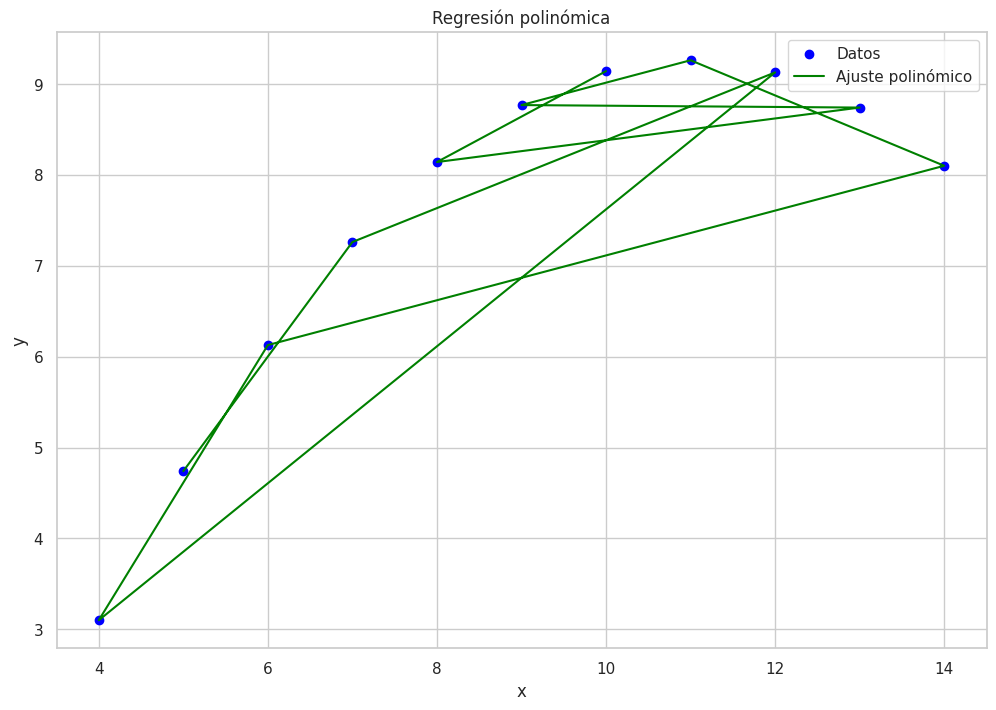

In [5]:
from sklearn.preprocessing import PolynomialFeatures
datos_grupo = data[data['dataset'] == "II"]
x = datos_grupo['x'].values.reshape(-1, 1)
y = datos_grupo['y'].values
poli = PolynomialFeatures(degree=2)
x_poli = poli.fit_transform(x)
modelo_poli = LinearRegression()
modelo_poli.fit(x_poli, y)
y_pred_poli = modelo_poli.predict(x_poli)
mse = mean_squared_error(y, y_pred_poli)
r2 = r2_score(y, y_pred_poli)

print("\nRegresion polinomica")
print(f"error cuadratico medio: {mse:.2f}")
print(f"coeficiente de determinacion: {r2:.2f}")
plt.figure()
plt.scatter(x, y, color="blue", label="Datos")
plt.plot(x, y_pred_poli, color="green", label="Ajuste polinomico")
plt.title("Regresion polinomica")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()